In [2]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd


In [3]:
df = pd.read_csv("synthetic_3class_dataset.csv")

df.head()

,Feature1,Feature2,Feature3,Class
0,7.174648,16.288583,5.473861,Class C
1,17.736900,5.418562,10.021031,Class B
2,7.295788,16.356400,4.536582,Class C
3,14.068540,1.081176,9.900739,Class B
4,2.560894,11.206882,14.246868,Class A


In [10]:
np.random.seed(0)

class_map = {'Class A': 0, 'Class B': 1, 'Class C': 2}
df['Class'] = df['Class'].map(class_map)

X = df[['Feature1', 'Feature2', 'Feature3']].values
Y = df['Class'].values

print(X.shape)
print(Y.shape)

(500, 3)
(500,)


In [18]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 3
        first_hiddenLayerNeurons = 10
        second_hiddenLayerNeurons = 15
        third_hiddenLayerNeurons = 7
        outLayerNeurons = 1

        self.learning_rate = 0.01
        self.W_H1I = np.random.randn(inputLayerNeurons, first_hiddenLayerNeurons)
        self.W_H2H1 = np.random.randn(first_hiddenLayerNeurons, second_hiddenLayerNeurons)
        self.W_H3H2 = np.random.randn(second_hiddenLayerNeurons, third_hiddenLayerNeurons)
        self.W_OH3 = np.random.randn(third_hiddenLayerNeurons, outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der == True:
            return x * (1-x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I)
        self.hidden1_output = self.sigmoid(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1)
        self.hidden2_output = self.sigmoid(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2)
        self.hidden3_output = self.sigmoid(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_OH3)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = hidden3_error * self.sigmoid(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        self.W_OH3 += self.hidden3_output.T.dot(output_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H1I += X.T.dot(hidden1_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

In [19]:
NN = NeuralNetwork()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)

ValueError: shapes (500,500) and (1,7) not aligned: 500 (dim 1) != 1 (dim 0)

Class
Class A    176
Class B    170
Class C    154
Name: count, dtype: int64


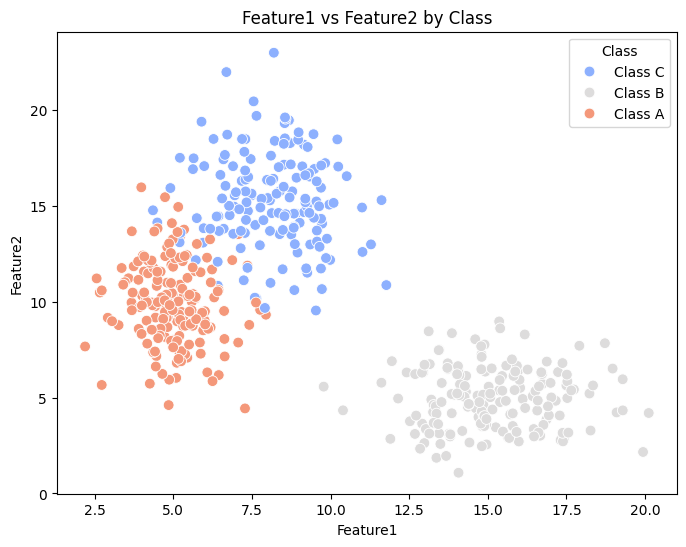

In [6]:
import seaborn as sns

print(df['Class'].value_counts())  # Check class balance

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Feature1",
    y="Feature2",
    hue="Class",
    palette="coolwarm",
    s=60
)
plt.title("Feature1 vs Feature2 by Class")
plt.show()

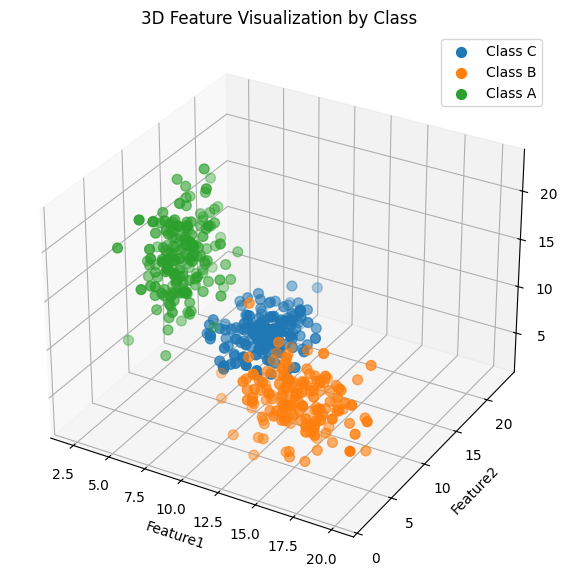

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

for cls in df['Class'].unique():
    subset = df[df['Class'] == cls]
    ax.scatter(subset['Feature1'], subset['Feature2'], subset['Feature3'], label=cls, s=50)

ax.set_xlabel("Feature1")
ax.set_ylabel("Feature2")
ax.set_zlabel("Feature3")
ax.set_title("3D Feature Visualization by Class")
ax.legend()
plt.show()